In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle

In [2]:
import pyLDAvis
import pyLDAvis.sklearn
from collections import Counter

In [3]:
#df = pd.read_csv('Full_text_TOKEN_clean.csv', index_col = 0)

C:\Users\akardash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from textblob import TextBlob

C:\Users\akardash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

C:\Users\akardash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
pip install install ipython==7.17

Note: you may need to restart the kernel to use updated packages.


In [7]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [10]:
df = pd.read_csv('Full_text_TOKEN_clean.csv', index_col = 0)

In [11]:
df.head(2)

,Title,Text,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,3002.pdf,"\n \nImmunization Program/Puerto Rico Department of Health\n \nOCTOBER 16, 2020\n| \nV\nERSION ...","['Immunization', 'Program/Puerto', 'Rico', 'Department', 'of', 'Health', 'OCTOBER', '16', ',', '...","['immunization', 'program/puerto', 'rico', 'department', 'of', 'health', 'october', '16', ',', '...","['immunization', 'program/puerto', 'rico', 'department', 'of', 'health', 'october', '16', '2020'...","['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',...","[('immunization', 'NN'), ('program/puerto', 'NN'), ('rico', 'VBP'), ('department', 'NN'), ('heal...","[('immunization', 'n'), ('program/puerto', 'n'), ('rico', 'v'), ('department', 'n'), ('health', ...","['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',..."
1,ARCEMP-1Sept2021-Final_ ARKANSAS.pdf,"Arkansas \nComprehensive \nEmergency \nManagement Plan \n (ARCEMP) \n September 1, 2021\n I ...","['Arkansas', 'Comprehensive', 'Emergency', 'Management', 'Plan', '(', 'ARCEMP', ')', 'September'...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', '(', 'arcemp', ')', 'september'...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","[('arkansas', 'NNS'), ('comprehensive', 'JJ'), ('emergency', 'NN'), ('management', 'NN'), ('plan...","[('arkansas', 'n'), ('comprehensive', 'a'), ('emergency', 'n'), ('management', 'n'), ('plan', 'n...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20..."


In [12]:
list(df.columns.values)

['Title',
 'Text',
 'tokenized',
 'lower',
 'no_punc',
 'stopwords_removed',
 'pos_tags',
 'wordnet_pos',
 'lemmatized']

In [13]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head(2)

,Title,Text,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,3002.pdf,"\n \nImmunization Program/Puerto Rico Department of Health\n \nOCTOBER 16, 2020\n| \nV\nERSION ...","['Immunization', 'Program/Puerto', 'Rico', 'Department', 'of', 'Health', 'OCTOBER', '16', ',', '...","['immunization', 'program/puerto', 'rico', 'department', 'of', 'health', 'october', '16', ',', '...","['immunization', 'program/puerto', 'rico', 'department', 'of', 'health', 'october', '16', '2020'...","['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',...","[('immunization', 'NN'), ('program/puerto', 'NN'), ('rico', 'VBP'), ('department', 'NN'), ('heal...","[('immunization', 'n'), ('program/puerto', 'n'), ('rico', 'v'), ('department', 'n'), ('health', ...","['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',...","[ ' i m m u n i z a t i o n ' , ' p r o g r a m / p u e r t o ' , ' r i c o ' , ' d e p a ..."
1,ARCEMP-1Sept2021-Final_ ARKANSAS.pdf,"Arkansas \nComprehensive \nEmergency \nManagement Plan \n (ARCEMP) \n September 1, 2021\n I ...","['Arkansas', 'Comprehensive', 'Emergency', 'Management', 'Plan', '(', 'ARCEMP', ')', 'September'...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', '(', 'arcemp', ')', 'september'...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","[('arkansas', 'NNS'), ('comprehensive', 'JJ'), ('emergency', 'NN'), ('management', 'NN'), ('plan...","[('arkansas', 'n'), ('comprehensive', 'a'), ('emergency', 'n'), ('management', 'n'), ('plan', 'n...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","[ ' a r k a n s a s ' , ' c o m p r e h e n s i v e ' , ' e m e r g e n c y ' , ' m a n a ..."


In [14]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)

In [18]:
df.head(2)

,Title,Text,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,word_count,review_len
0,3002.pdf,"\n \nImmunization Program/Puerto Rico Department of Health\n \nOCTOBER 16, 2020\n| \nV\nERSION ...","['Immunization', 'Program/Puerto', 'Rico', 'Department', 'of', 'Health', 'OCTOBER', '16', ',', '...","['immunization', 'program/puerto', 'rico', 'department', 'of', 'health', 'october', '16', ',', '...","['immunization', 'program/puerto', 'rico', 'department', 'of', 'health', 'october', '16', '2020'...","['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',...","[('immunization', 'NN'), ('program/puerto', 'NN'), ('rico', 'VBP'), ('department', 'NN'), ('heal...","[('immunization', 'n'), ('program/puerto', 'n'), ('rico', 'v'), ('department', 'n'), ('health', ...","['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',...","[ ' i m m u n i z a t i o n ' , ' p r o g r a m / p u e r t o ' , ' r i c o ' , ' d e p a ...",11635,243553
1,ARCEMP-1Sept2021-Final_ ARKANSAS.pdf,"Arkansas \nComprehensive \nEmergency \nManagement Plan \n (ARCEMP) \n September 1, 2021\n I ...","['Arkansas', 'Comprehensive', 'Emergency', 'Management', 'Plan', '(', 'ARCEMP', ')', 'September'...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', '(', 'arcemp', ')', 'september'...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","[('arkansas', 'NNS'), ('comprehensive', 'JJ'), ('emergency', 'NN'), ('management', 'NN'), ('plan...","[('arkansas', 'n'), ('comprehensive', 'a'), ('emergency', 'n'), ('management', 'n'), ('plan', 'n...","['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...","[ ' a r k a n s a s ' , ' c o m p r e h e n s i v e ' , ' e m e r g e n c y ' , ' m a n a ...",84429,1804679


In [32]:
words = df['lemmatized']
# allwords = []
# for wordlist in words:
#     allwords += wordlist
print(words)

0     ['immunization', 'program/puerto', 'rico', 'department', 'health', 'october', '16', '2020', 'v',...
1     ['arkansas', 'comprehensive', 'emergency', 'management', 'plan', 'arcemp', 'september', '1', '20...
2     ['maine', 'center', 'disease', 'control', 'prevention', 'october', '16', '2020', 'v', '1.0', 'co...
3     ['massachusetts', 'department', 'public', 'health', '16', 'october', '2020', 'v1.0', 'covid', '-...
4     ['page', 'covid', '-19', 'response', 'intermediate', 'care', 'facility', 'individual', 'intellec...
5     ['nj', 'division', 'developmental', 'disability', 'day', 'service', 'update', 'july', '2021', 'p...
6     ['new', 'hampshire', 'coronavirus', 'disease', '2019', 'vaccination', 'plan', 'march', '15', '20...
7     ['1', 'vermont', 'department', 'health', 'version', '2.0', 'christine', 'finley/vermont', 'depar...
8     ['covid', '19', 'response', 'telecommunication', 'recovery', 'plan', 'draft', 'prepared', 'state...
9     ['coronavirus', 'disease', '2019', 'covi

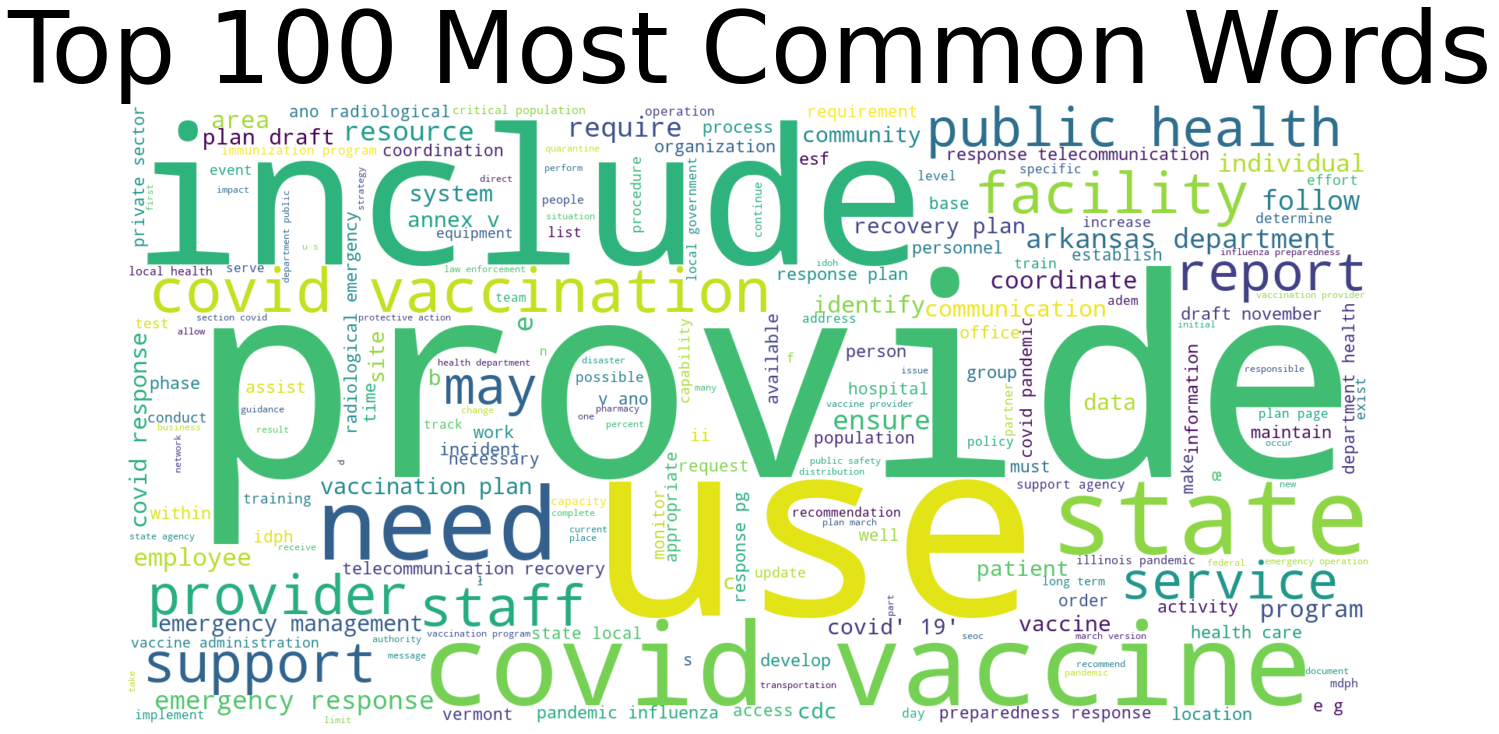

In [30]:
mostcommon = FreqDist(words).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [33]:
# mostcommon_small = FreqDist(words).most_common(25)
# x, y = zip(*mostcommon_small)
# plt.figure(figsize=(50,30))
# plt.margins(0.02)
# plt.bar(x, y)
# plt.xlabel('Words', fontsize=50)
# plt.ylabel('Frequency of Words', fontsize=50)
# plt.yticks(fontsize=40)
# plt.xticks(rotation=60, fontsize=40)
# plt.title('Frequency of 25 Most Common Words', fontsize=60)
# plt.show()

In [34]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df["lemmatized"].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

ValueError: max_df corresponds to < documents than min_df